## Data Pre-processing
1. missing values: filled with 0
2. outliers: replaced

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# Load the dataset
data = pd.read_excel('TrainingData.xlsx', header=None)
# data_row = pd.read_excel('TrainingData.xlsx', header=None)
# data = data_row.iloc[:,:4]

# another way if we konw the missing value symbols
# missing_symbols = ['?']  # Replace 'symbol1', 'symbol2', etc. with the actual symbols
# data = pd.read_excel('TrainingData.xlsx', header=None, na_values=missing_symbols)

data

,0,1,2,3,4
0,7.7,3.8,6.7,2.2,2
1,5,2.3,3.3,1,3
2,5,3.4,1.6,0.4,1
3,4.9,3.1,1.5,0.2,1
4,5.4,3.9,1.3,0.4,1
...,...,...,...,...,...
115,4.3,3.0,1.1,0.1,1
116,5.7,2.9,4.2,5.3,3
117,4.4,3.0,1.3,0.2,1
118,6.7,3.3,5.7,2.1,2


In [92]:
# check for missing values, treating non-numeric values as missing values
data_miss = data.apply(pd.to_numeric, errors='coerce')
missing_values = data_miss.isnull()
missing_values_count = missing_values.sum()
print("Missing values:")
print(missing_values_count)

# 0: 39,61
# 3: 83

Missing values:
0    2
1    0
2    0
3    1
4    0
dtype: int64


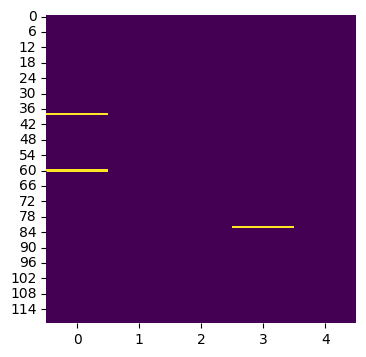

In [93]:
# Create a heatmap of missing values
plt.figure(figsize=(4, 4))
sns.heatmap(missing_values, cmap='viridis', cbar=False)
plt.show()

In [94]:
# fill all missing values as mean
data_filled = data_miss.fillna(data_miss.mean())
data_filled

,0,1,2,3,4
0,7.7,3.8,6.7,2.2,2
1,5.0,2.3,3.3,1.0,3
2,5.0,3.4,1.6,0.4,1
3,4.9,3.1,1.5,0.2,1
4,5.4,3.9,1.3,0.4,1
...,...,...,...,...,...
115,4.3,3.0,1.1,0.1,1
116,5.7,2.9,4.2,5.3,3
117,4.4,3.0,1.3,0.2,1
118,6.7,3.3,5.7,2.1,2


Outliers:
        0    1     2    3  4
90    6.3  3.3  16.0  2.5  2
95   10.6  3.2   1.4  0.2  1
97    5.7  4.4   1.5  0.4  1
116   5.7  2.9   4.2  5.3  3


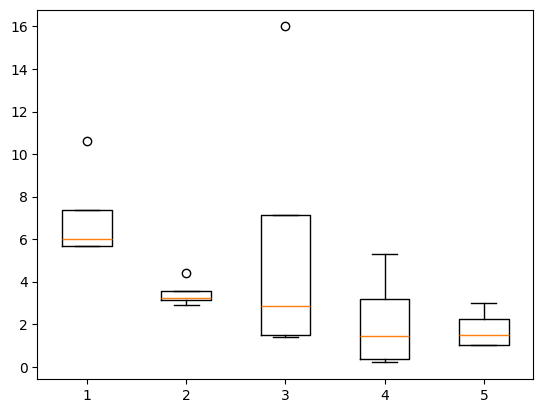

In [95]:
# detect outliers, using Z-score method
z_scores = stats.zscore(data_filled)
outliers = data_filled[(z_scores > 3).any(axis=1)]
print("Outliers:")
print(outliers)

# Visualize outliers
plt.boxplot(outliers)
plt.show()

In [96]:
data_cleaned = data_filled[(z_scores<3)]

# use mean to replace outliers
data_cleaned = data_cleaned.fillna(data_cleaned.mean())
data_cleaned

,0,1,2,3,4
0,7.7,3.8,6.7,2.200000,2
1,5.0,2.3,3.3,1.000000,3
2,5.0,3.4,1.6,0.400000,1
3,4.9,3.1,1.5,0.200000,1
4,5.4,3.9,1.3,0.400000,1
...,...,...,...,...,...
115,4.3,3.0,1.1,0.100000,1
116,5.7,2.9,4.2,1.202832,3
117,4.4,3.0,1.3,0.200000,1
118,6.7,3.3,5.7,2.100000,2


## Binary Classification Tree

In [97]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train_features = data_cleaned.iloc[:, 0:4]  # features
train_labels = data_cleaned.iloc[:, 4]  # labels

model = DecisionTreeClassifier()
model.fit(train_features, train_labels)

test_data = pd.read_excel('TestData.xlsx',header=None)

test_features = test_data.iloc[:, 0:4]
test_pred = model.predict(test_features)

test_labeled = test_data.copy()
test_labeled['label_predict'] = test_pred
test_labeled

,0,1,2,3,label_predict
0,4.8,3.1,1.6,0.2,1
1,5.1,3.5,1.4,0.3,1
2,4.8,3.0,1.4,0.1,1
3,5.7,3.8,1.7,0.3,1
4,5.5,4.2,1.4,0.2,1
5,5.0,3.4,1.5,0.2,1
6,4.6,3.1,1.5,0.2,1
7,5.8,4.0,1.2,0.2,1
8,5.0,3.6,1.4,0.2,1
9,4.6,3.4,1.4,0.3,1


## My Binary Classification Tree

In [98]:
class MyNode:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index  # 特征索引
        self.threshold = threshold  # 分割阈值
        self.left = left  # 左子节点
        self.right = right  # 右子节点
        self.value = value  # 叶节点的类别值
        
        
class MyBinaryClassificationTree:
    def __init__(self):
        self.root = None  # 树的根节点

    def train(self, X, y):
        self.root = self._build_tree(X, y)

    def predict(self, X):
        predictions = []
        for sample in X:
            predictions.append(self._traverse_tree(sample, self.root))
        return predictions

    def _build_tree(self, X, y):
        # 递归构建二叉树
        # 在每个节点上选择最佳特征和阈值进行分割
        # 创建左子树和右子树，并递归地构建它们
        # 返回当前节点

        # TODO: 在这里实现构建树的逻辑
        return

    def _traverse_tree(self, sample, node):
        # 递归地遍历二叉树，根据样本的特征值判断是向左子树还是右子树移动
        # 当达到叶节点时，返回叶节点的类别值

        # TODO: 在这里实现遍历树的逻辑
        return